# Demo for a feature to add a time scale as an argument to the detection method


The time series is not long enough for detecting shifts at timescales of 100 (units of time). A maximum upper bound of 33.333333333333336 (units of time) has been imposed. This corresponds to 1/3 the length of the time series.
The time series is not long enough for detecting shifts at timescales of 100 (units of time). A maximum upper bound of 33.333333333333336 (units of time) has been imposed. This corresponds to 1/3 the length of the time series.


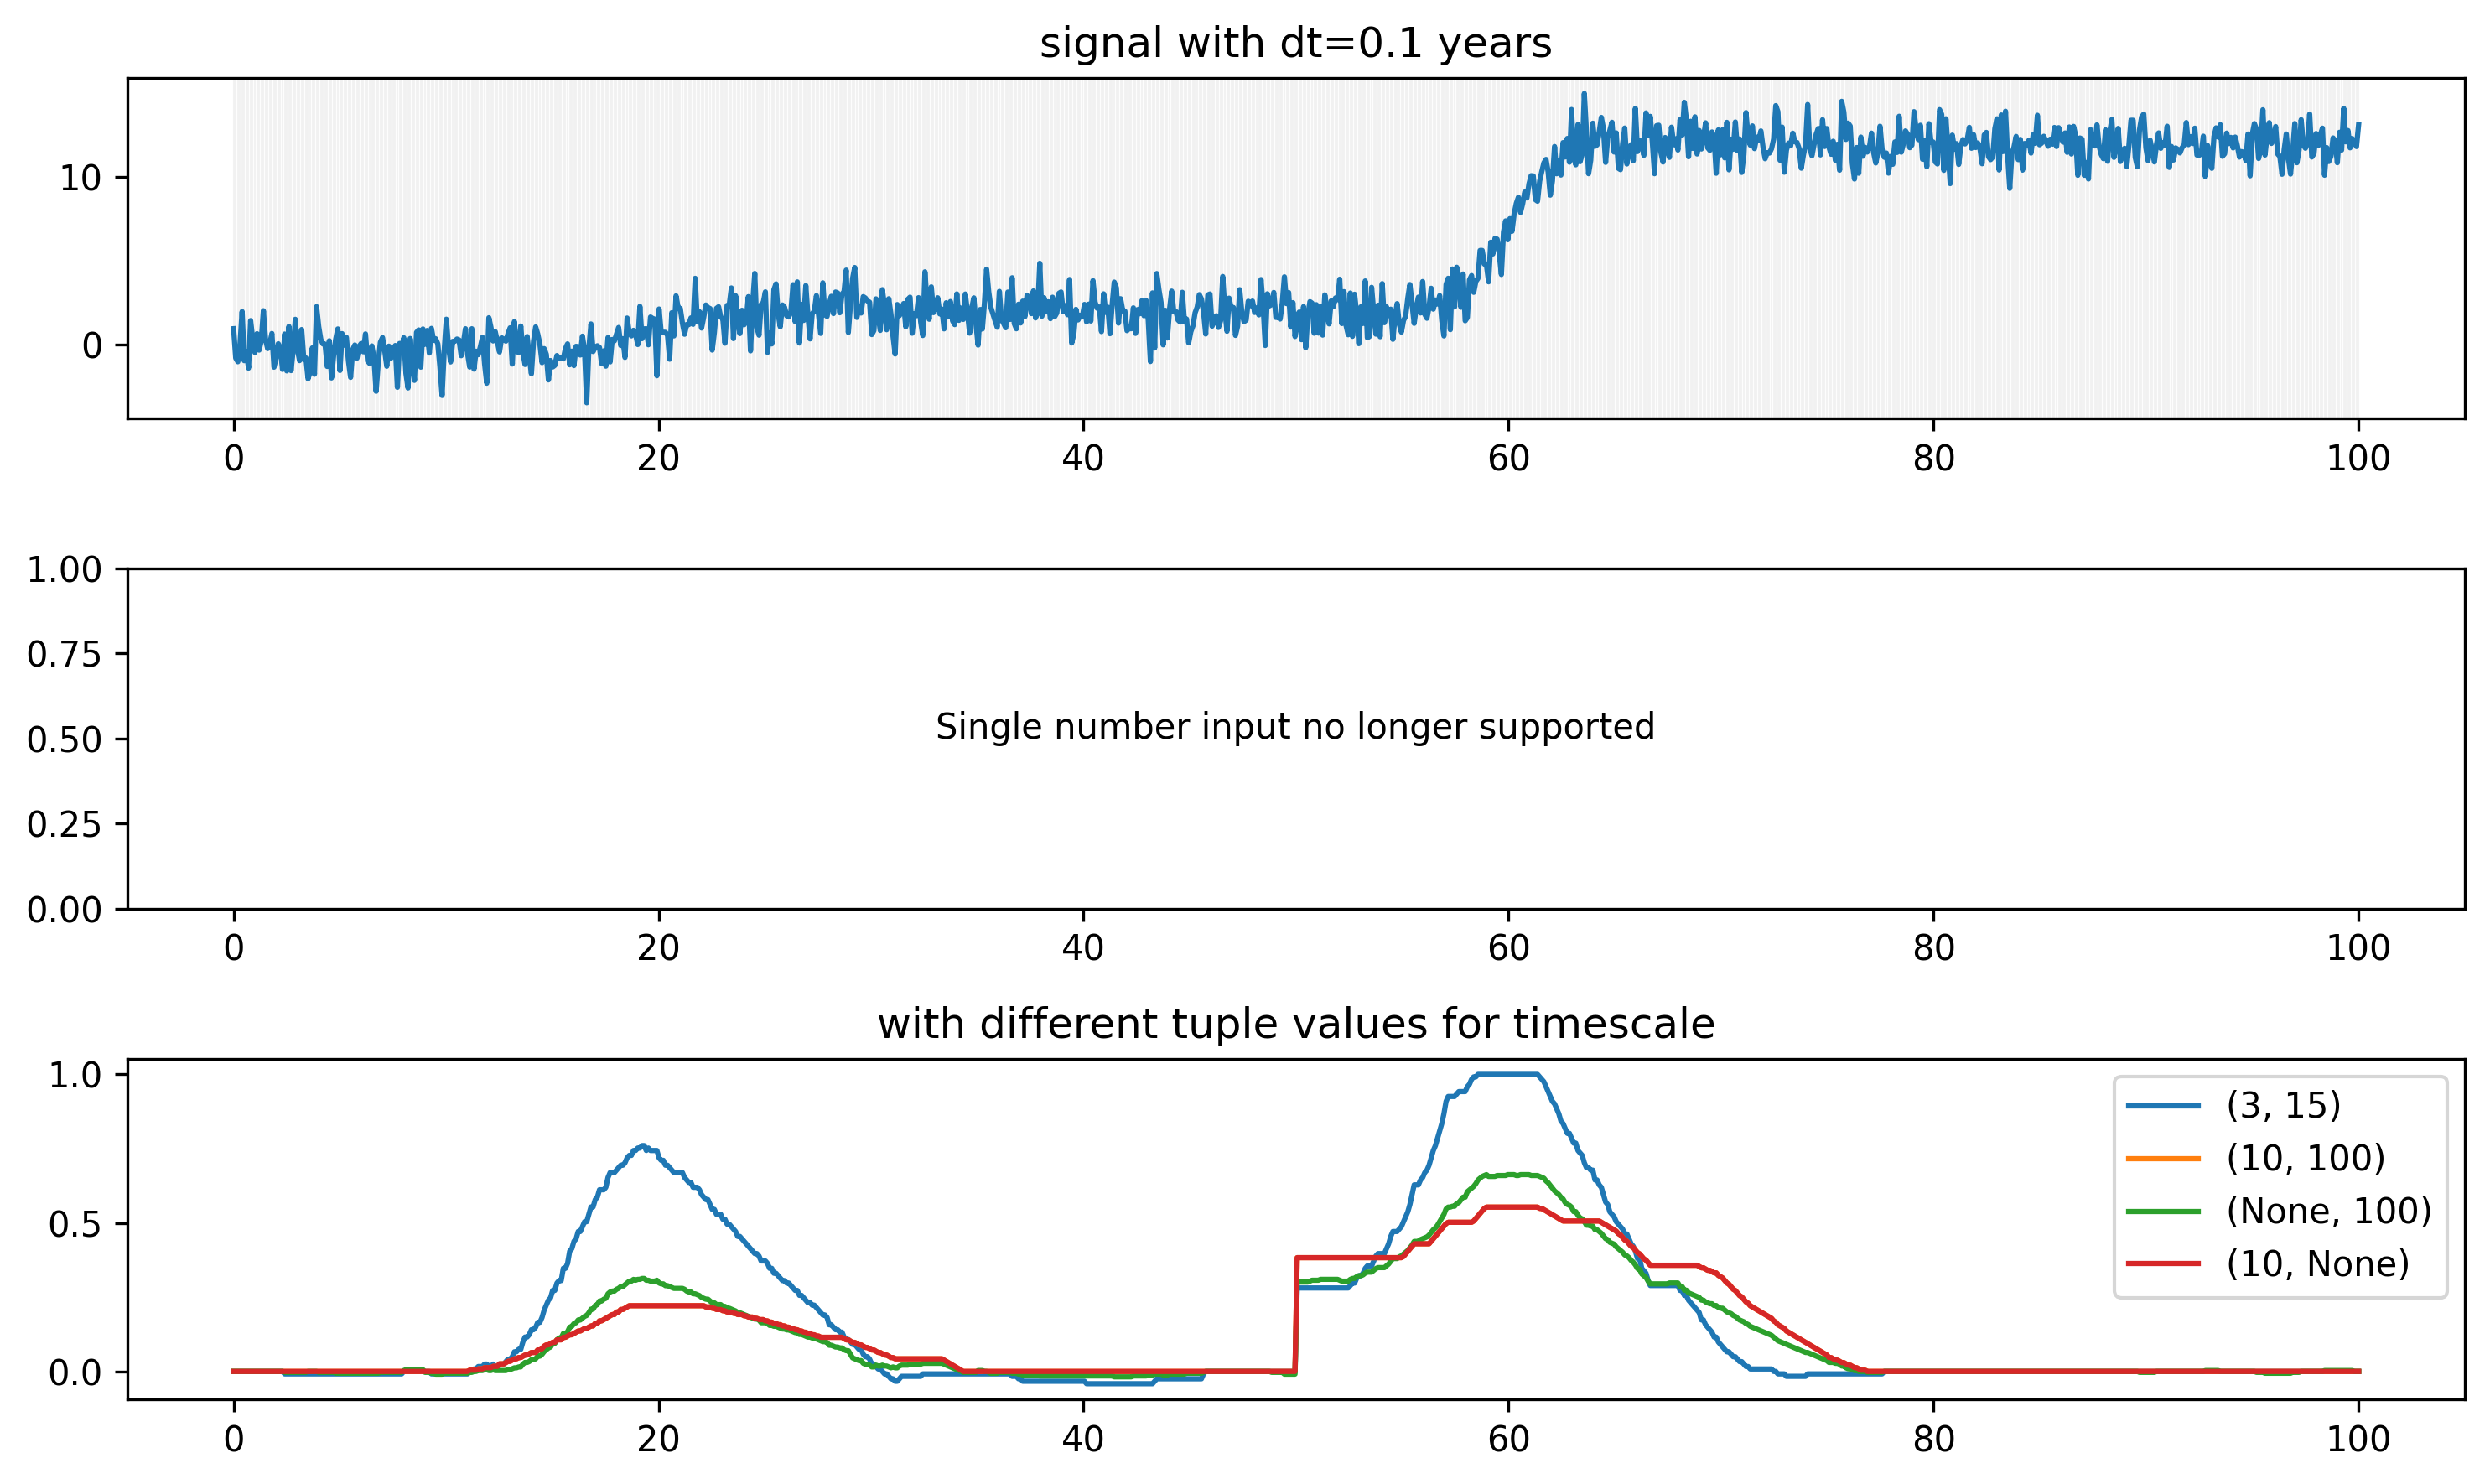

The time series is not long enough for detecting shifts at timescales of 100 (units of time). A maximum upper bound of 33.16582914572864 (units of time) has been imposed. This corresponds to 1/3 the length of the time series.
The time series is not long enough for detecting shifts at timescales of 100 (units of time). A maximum upper bound of 33.16582914572864 (units of time) has been imposed. This corresponds to 1/3 the length of the time series.


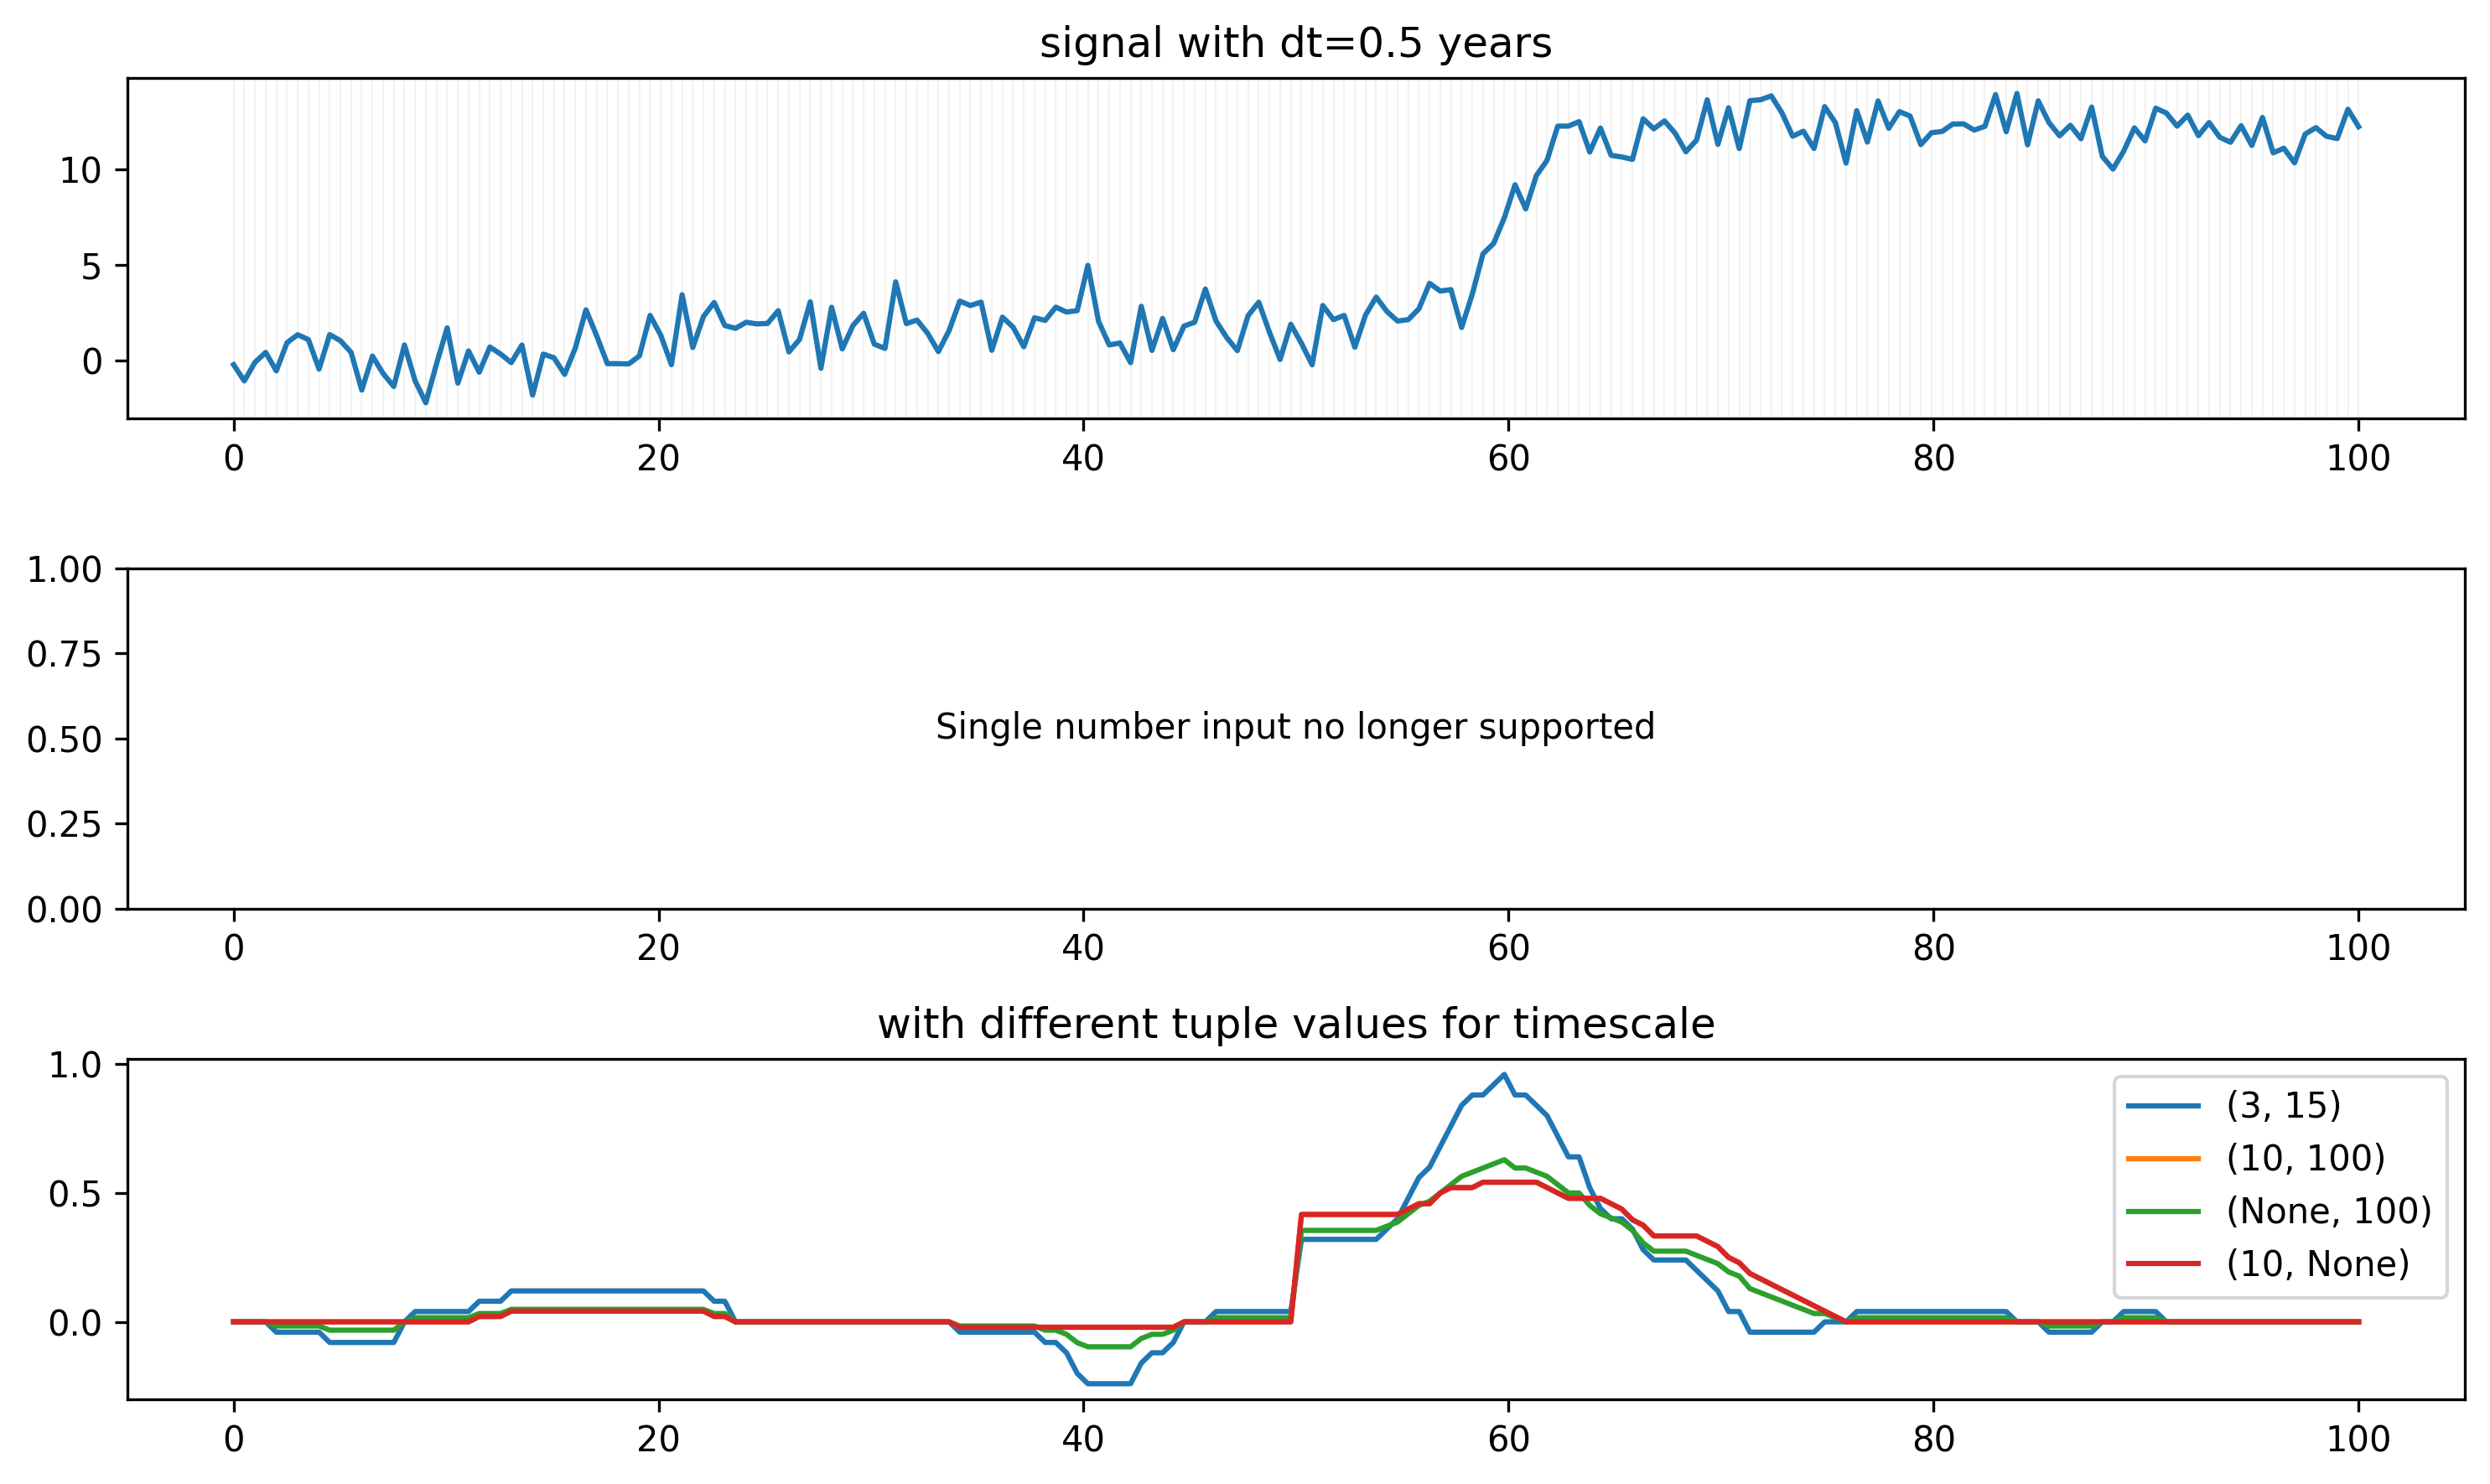

In [1]:
import toad
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (10, 6)


def shift(mag, t, t0):
    return mag * (1 / (1 + np.exp(-(t - t0))))


# Do the following for two different time resolutions to show that lmin, lmax
# are inferred/adapted correctly

for dt in (0.1, 0.5):
    Tmax = 100  # years
    nT = int(Tmax / dt)  # number of gridpoints in time

    # SIGNAL GENERATION =======================================================
    noise = np.random.normal(size=nT)
    time = np.linspace(0, Tmax, nT)

    signal = noise + shift(10, time, 60) + shift(2, time, 20)

    # PLOT: SIGNAL ============================================================
    fig = plt.figure()
    gs = fig.add_gridspec(ncols=1, nrows=3)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(time, signal)
    for t in time:
        ax1.axvline(t, color="grey", alpha=0.1, lw=0.5, zorder=-1)
    ax1.set_title(f"signal with dt={dt} years")

    # PLOT: DETECTION TIME SERIES on FLOAT TIMESCALE ==========================
    # NO LONGER SUPPORTED
    ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
    # for timescale in [2, 5, 10, 20]:
    #     detector = toad.shifts.ASDETECT(timescale=timescale)
    #     dts = detector.fit_predict(signal, time)

    #     ax2.plot(time, dts, label=f"{timescale}")
    #     ax2.set_title("with different float values for timescale")
    # ax2.legend()
    ax2.text(
        0.5,
        0.5,
        "Single number input no longer supported",
        transform=ax2.transAxes,
        ha="center",
    )

    # PLOT: DETECTION TIME SERIES on TUPLE TIMESCALE ==========================
    ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
    for timescale in [
        (3, 15),
        (10, 100),
        (None, 100),
        (10, None),
    ]:  # if you set lower bound to 1, you will now get a helpful error saying the resolution is too low.
        detector = toad.shifts.ASDETECT(timescale=timescale)
        dts = detector.fit_predict(signal, time)

        ax3.plot(time, dts, label=f"{timescale}")
        ax3.set_title("with different tuple values for timescale")
    ax3.legend()

    plt.tight_layout()
    plt.show()

This below plot shows the infered lmin and lmax compared to the bounds of the algorithm, i.e. lmin=5 and lmax=n/3. The boxes illustrating the infered values are green if within the bounds of the algorithm, or red if outside. We need to tell the user that the chosen timescale is not supported. The plots show that the supported timescales changes depending on the resolution.


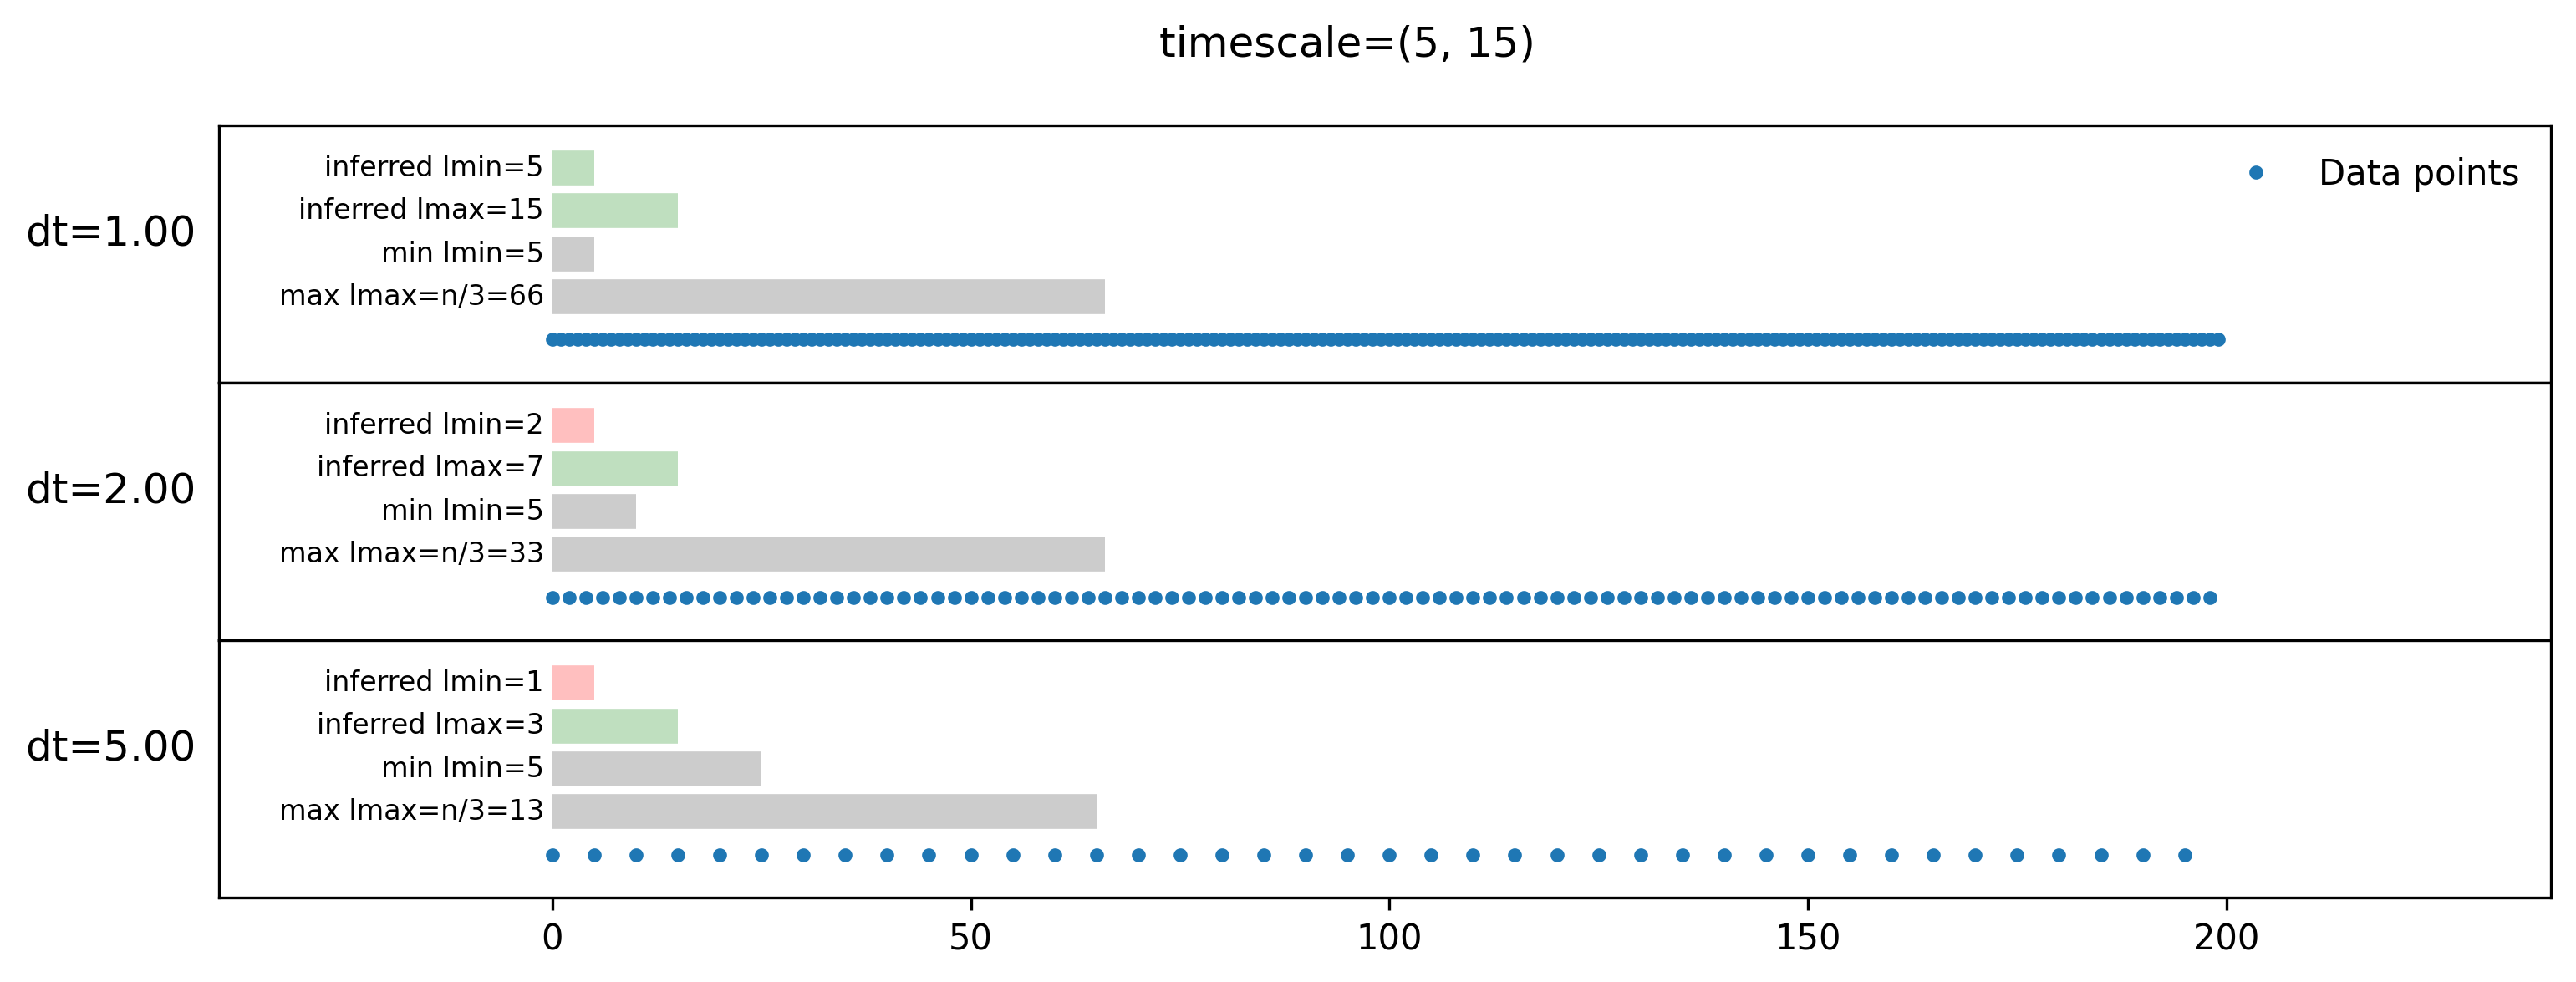

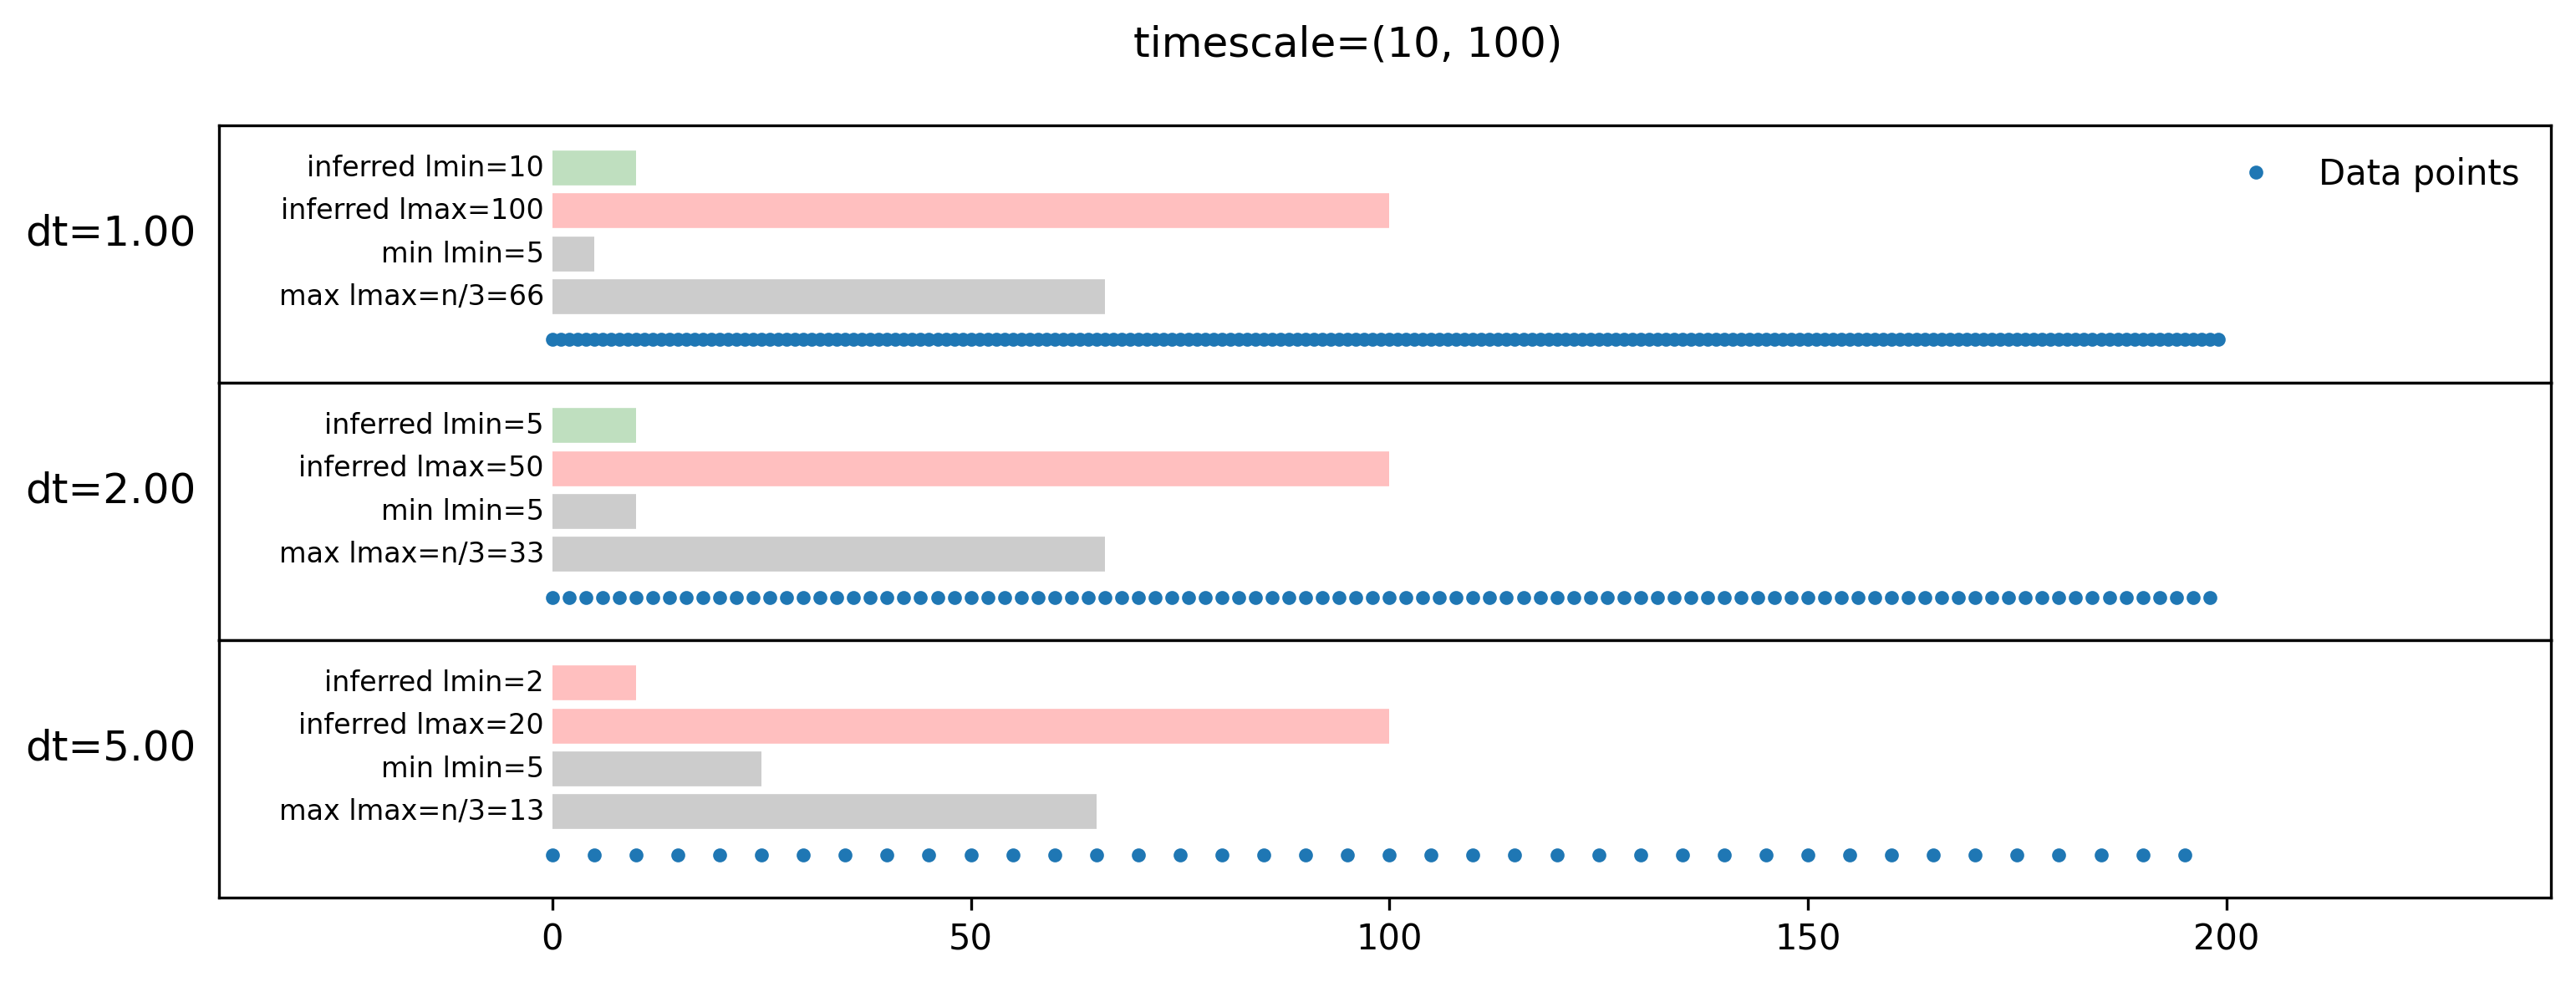

In [2]:
# USER DEFINED TIMESCALE
timescales = [
    (5, 15),
    (10, 100),
]

for timescale in timescales:
    fig, axs = plt.subplots(3, 1, figsize=(12, 4), sharex=True)
    for i, resolution in enumerate([1, 2, 5]):
        # change resolution
        times = np.arange(0, 200, 1)[::resolution]
        dt = np.diff(times)[0]

        # algorithmic bounds
        min_lmin = 5
        max_lmax = len(times) // 3

        # compute window size from scale
        lmin = int(timescale[0] / dt)  # -> convert to timesteps
        lmax = int(timescale[1] / dt)  # -> convert to timesteps

        # plot data points
        ax = axs[i]
        ax.plot(times, [0] * len(times), ".", label="Data points")

        ax.hlines(
            2,
            xmin=0,
            xmax=timescale[0],
            lw=10,
            alpha=0.25,
            color="green" if timescale[0] >= min_lmin * dt else "red",
        )
        ax.text(-1, 2, f"inferred lmin={lmin}", ha="right", va="center", fontsize=8)

        ax.hlines(
            1.5,
            xmin=0,
            xmax=timescale[1],
            lw=10,
            alpha=0.25,
            color="green" if timescale[1] <= max_lmax * dt else "red",
        )
        ax.text(-1, 1.5, f"inferred lmax={lmax}", ha="right", va="center", fontsize=8)

        # plot boundary min and max
        ax.hlines(1.0, xmin=0, xmax=min_lmin * dt, lw=10, alpha=0.20, color="black")
        ax.text(-1, 1.0, "min lmin=5", ha="right", va="center", fontsize=8)

        ax.hlines(0.5, xmin=0, xmax=max_lmax * dt, lw=10, alpha=0.20, color="black")
        ax.text(
            -1,
            0.5,
            f"max lmax=n/3={len(times) // 3}",
            ha="right",
            va="center",
            fontsize=8,
        )

        # ax.set_ylim(0, 3)
        ax.margins(y=0.25, x=0.2)
        ax.text(
            -0.01,
            0.5,
            f"dt={dt:.2f}",
            ha="right",
            va="bottom",
            transform=ax.transAxes,
            fontsize=12,
        )
        fig.suptitle(f"timescale={timescale}")

    axs[0].legend(frameon=False)
    plt.setp(axs, yticks=[])
    plt.subplots_adjust(hspace=0)

## Test

Below test requires the ponds package (https://github.com/tipmip-methods/ponds)


In [5]:
from ponds import PONDS, ELLIPSIS, SIGMOID, WhiteNoise

/Users/jakobharteg/GitHub/phd/ponds/ponds/shiftgen.py:112: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-k * (t - t0)))


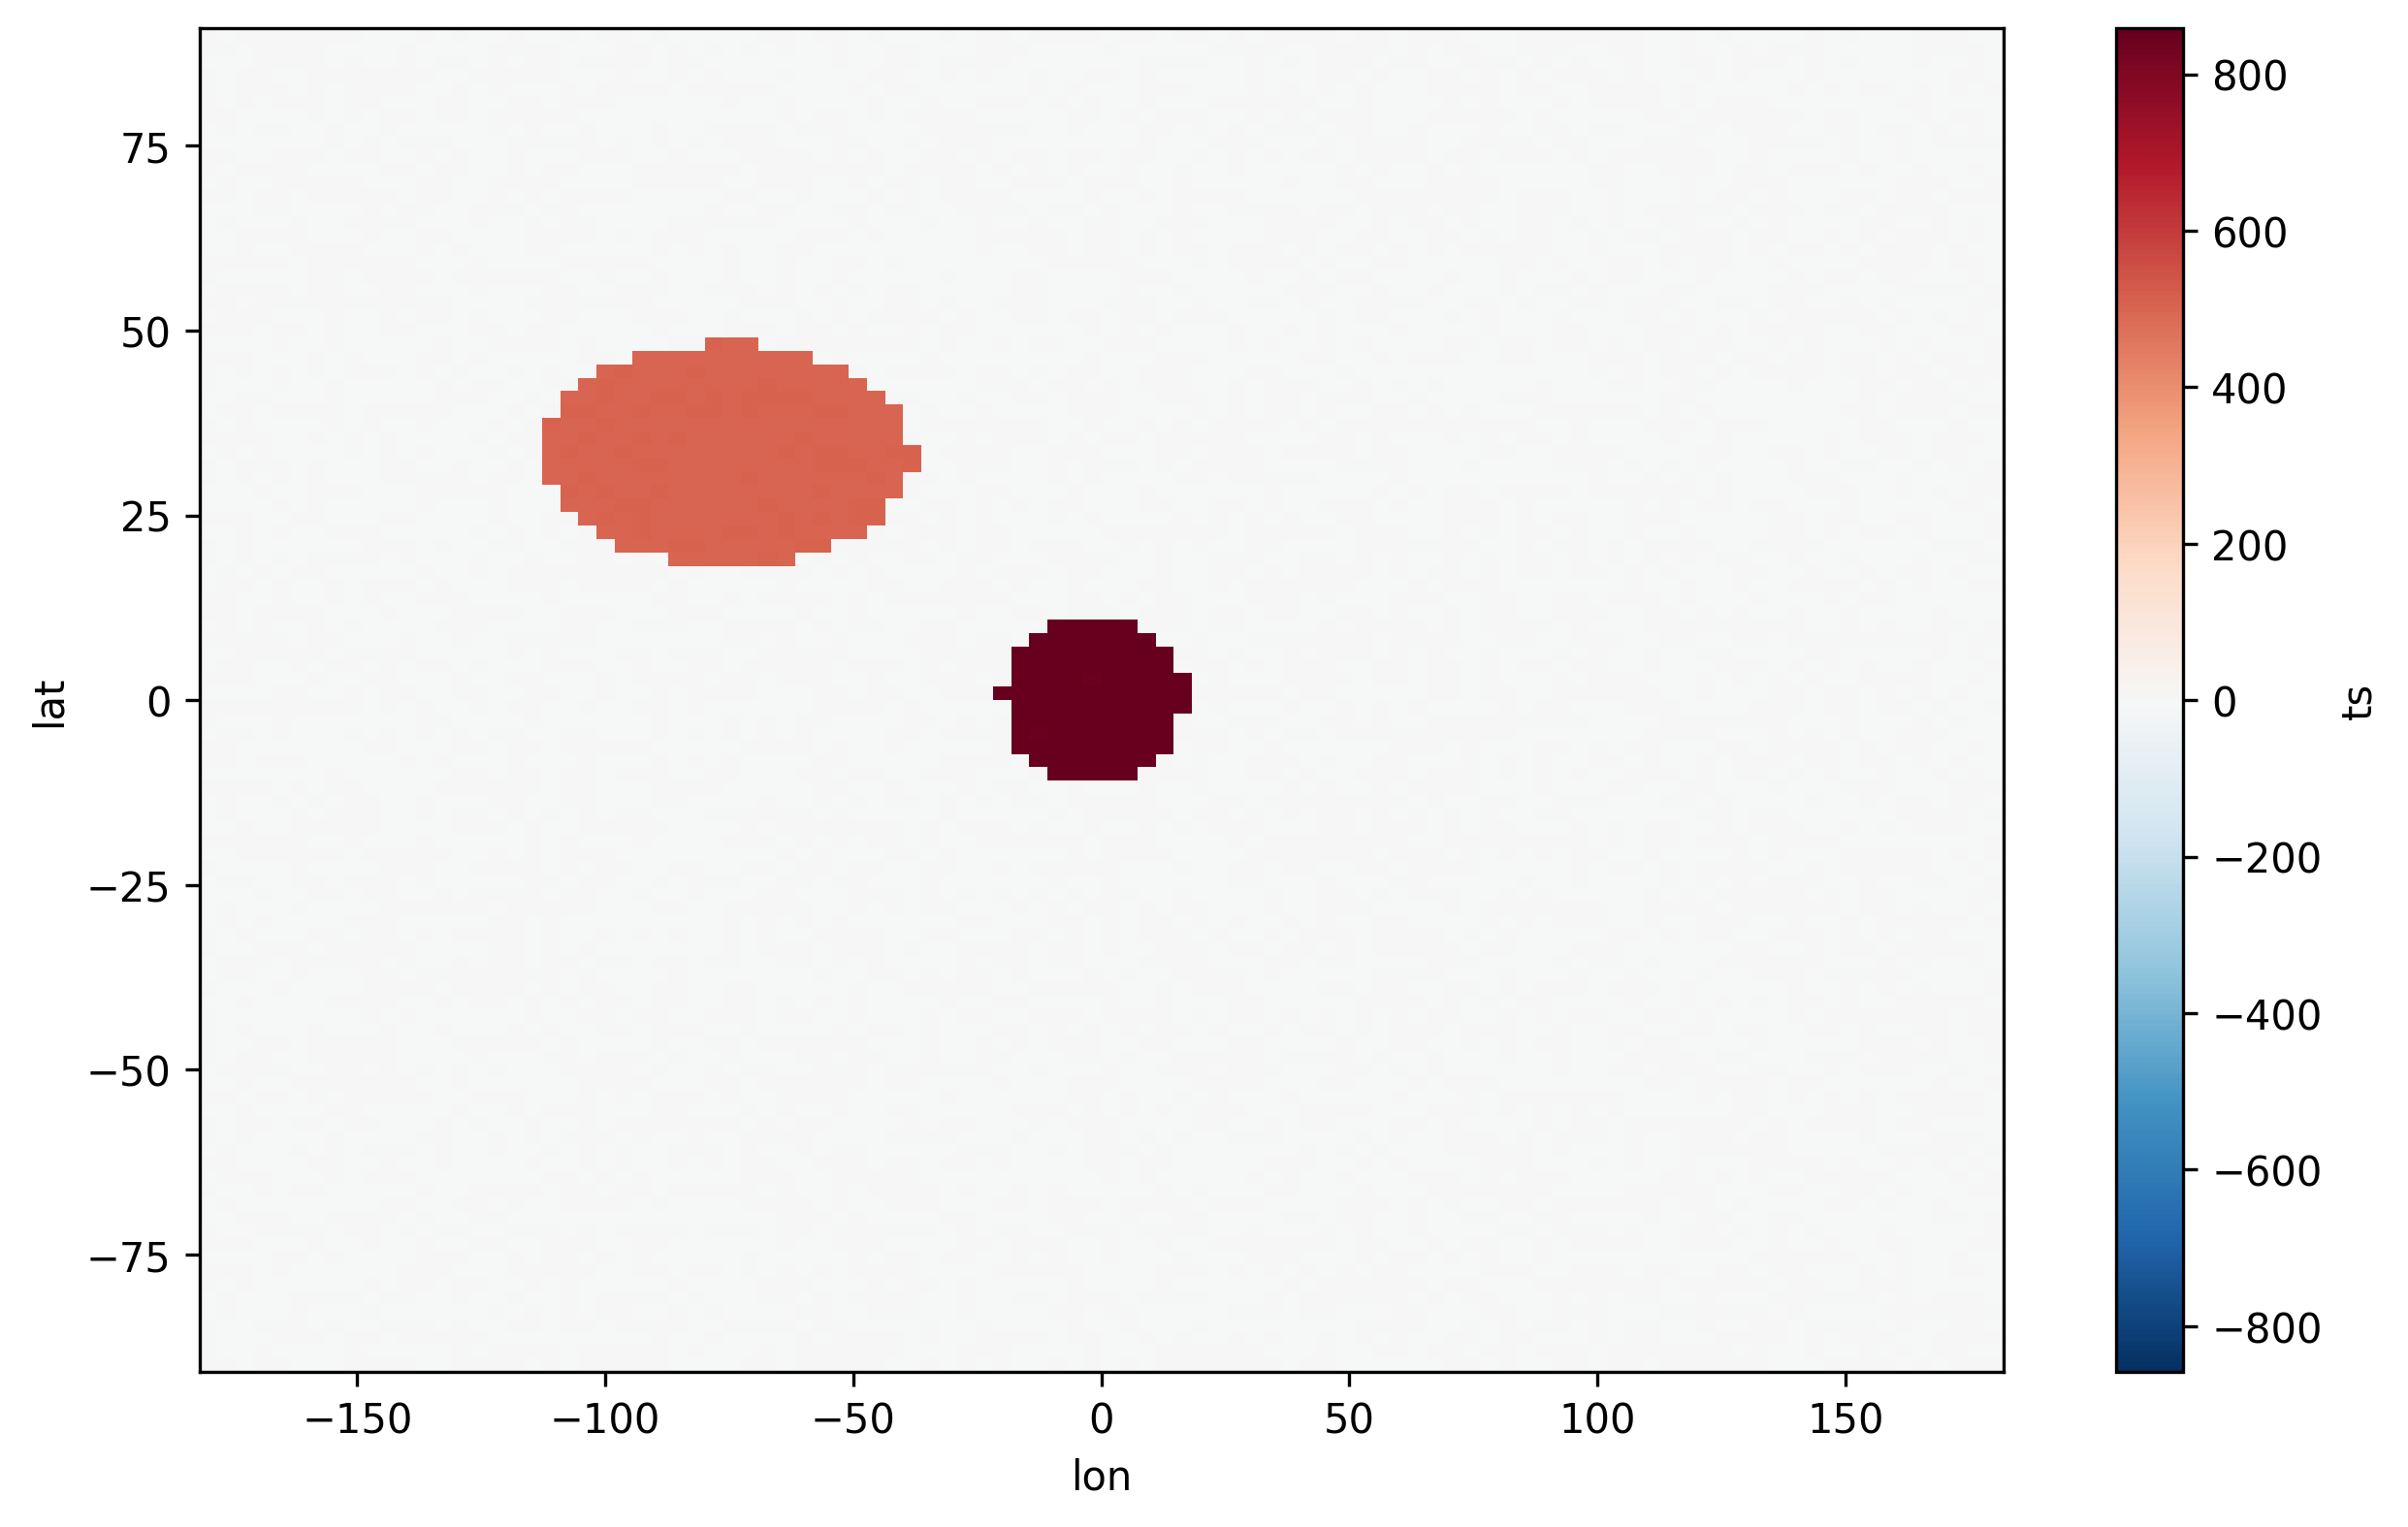

In [ ]:
i = 20
lat_size = 100
lon_size = 100
pd = PONDS(
    time_size=1000,
    lat_size=lat_size,
    lon_size=lon_size,
)

pd.add_perturbation(
    perturbation_method=WhiteNoise(random_seed=1, magnitude=0.05),
)

np.random.seed(3)
pd.add_shift(
    shift_method=SIGMOID(shift_steepness=10, central_time=500),
    shape_method=ELLIPSIS(),
)

np.random.seed(9)
pd.add_shift(
    shift_method=SIGMOID(shift_steepness=0.05, central_time=100),
    shape_method=ELLIPSIS(),
)

pd.data.ts.sum(dim=("time")).plot()

In [70]:
from toad import TOAD
from toad.shifts import ASDETECT
from sklearn.cluster import HDBSCAN

In [71]:
pd.data

<xarray.Dataset> Size: 100MB
Dimensions:  (time: 1000, lat: 100, lon: 100)
Coordinates:
  * time     (time) float64 8kB 0.0 1.0 2.0 3.0 4.0 ... 996.0 997.0 998.0 999.0
  * lat      (lat) float64 800B -90.0 -88.18 -86.36 -84.55 ... 86.36 88.18 90.0
  * lon      (lon) float64 800B -180.0 -176.4 -172.7 ... 172.7 176.4 180.0
Data variables:
    ts       (time, lat, lon) float64 80MB 0.08122 -0.007662 ... -0.03489
    c1       (time, lat, lon) bool 10MB False False False ... False False False
    c2       (time, lat, lon) bool 10MB False False False ... False False False
Attributes:
    cluster_key:       c
    perturbation_key:  p

In [72]:
td = TOAD(pd.data)

INFO: Applying detector ASDETECT to ts
INFO: Regridding ts_dts with HealPixRegridder
INFO: Applying clusterer HDBSCAN to ts_dts
INFO: Detected 11 clusters
INFO: Applying detector ASDETECT to ts
INFO: Regridding ts_dts with HealPixRegridder
INFO: Applying clusterer HDBSCAN to ts_dts
INFO: Detected 108 clusters


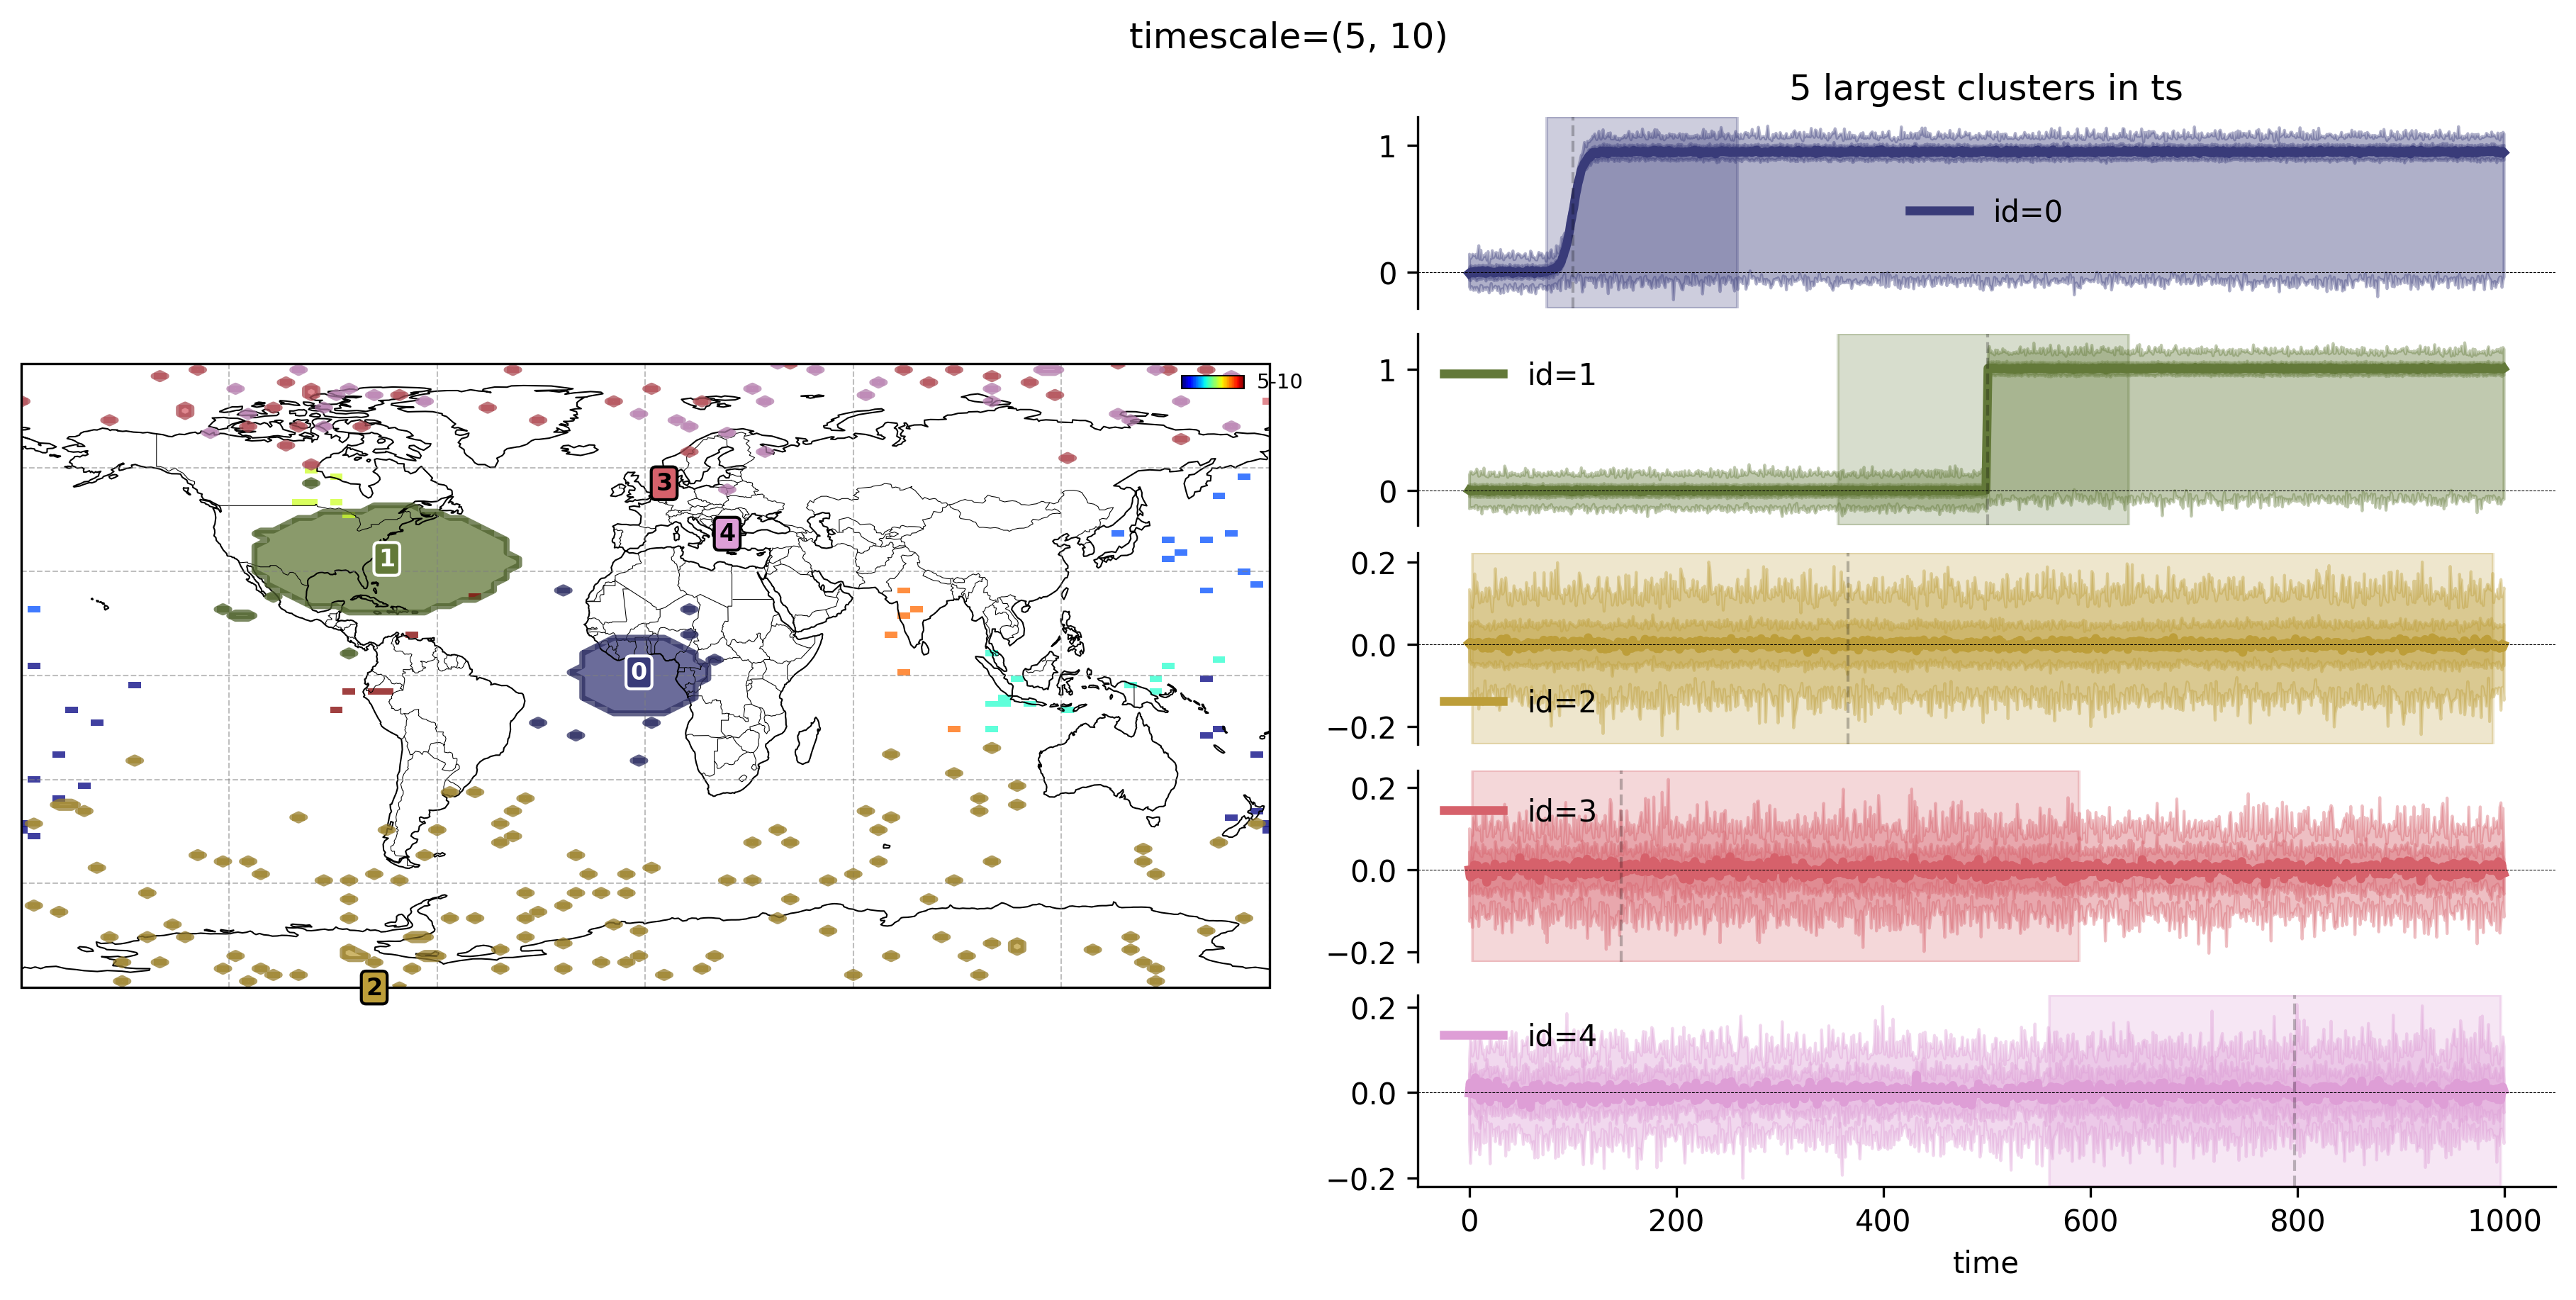

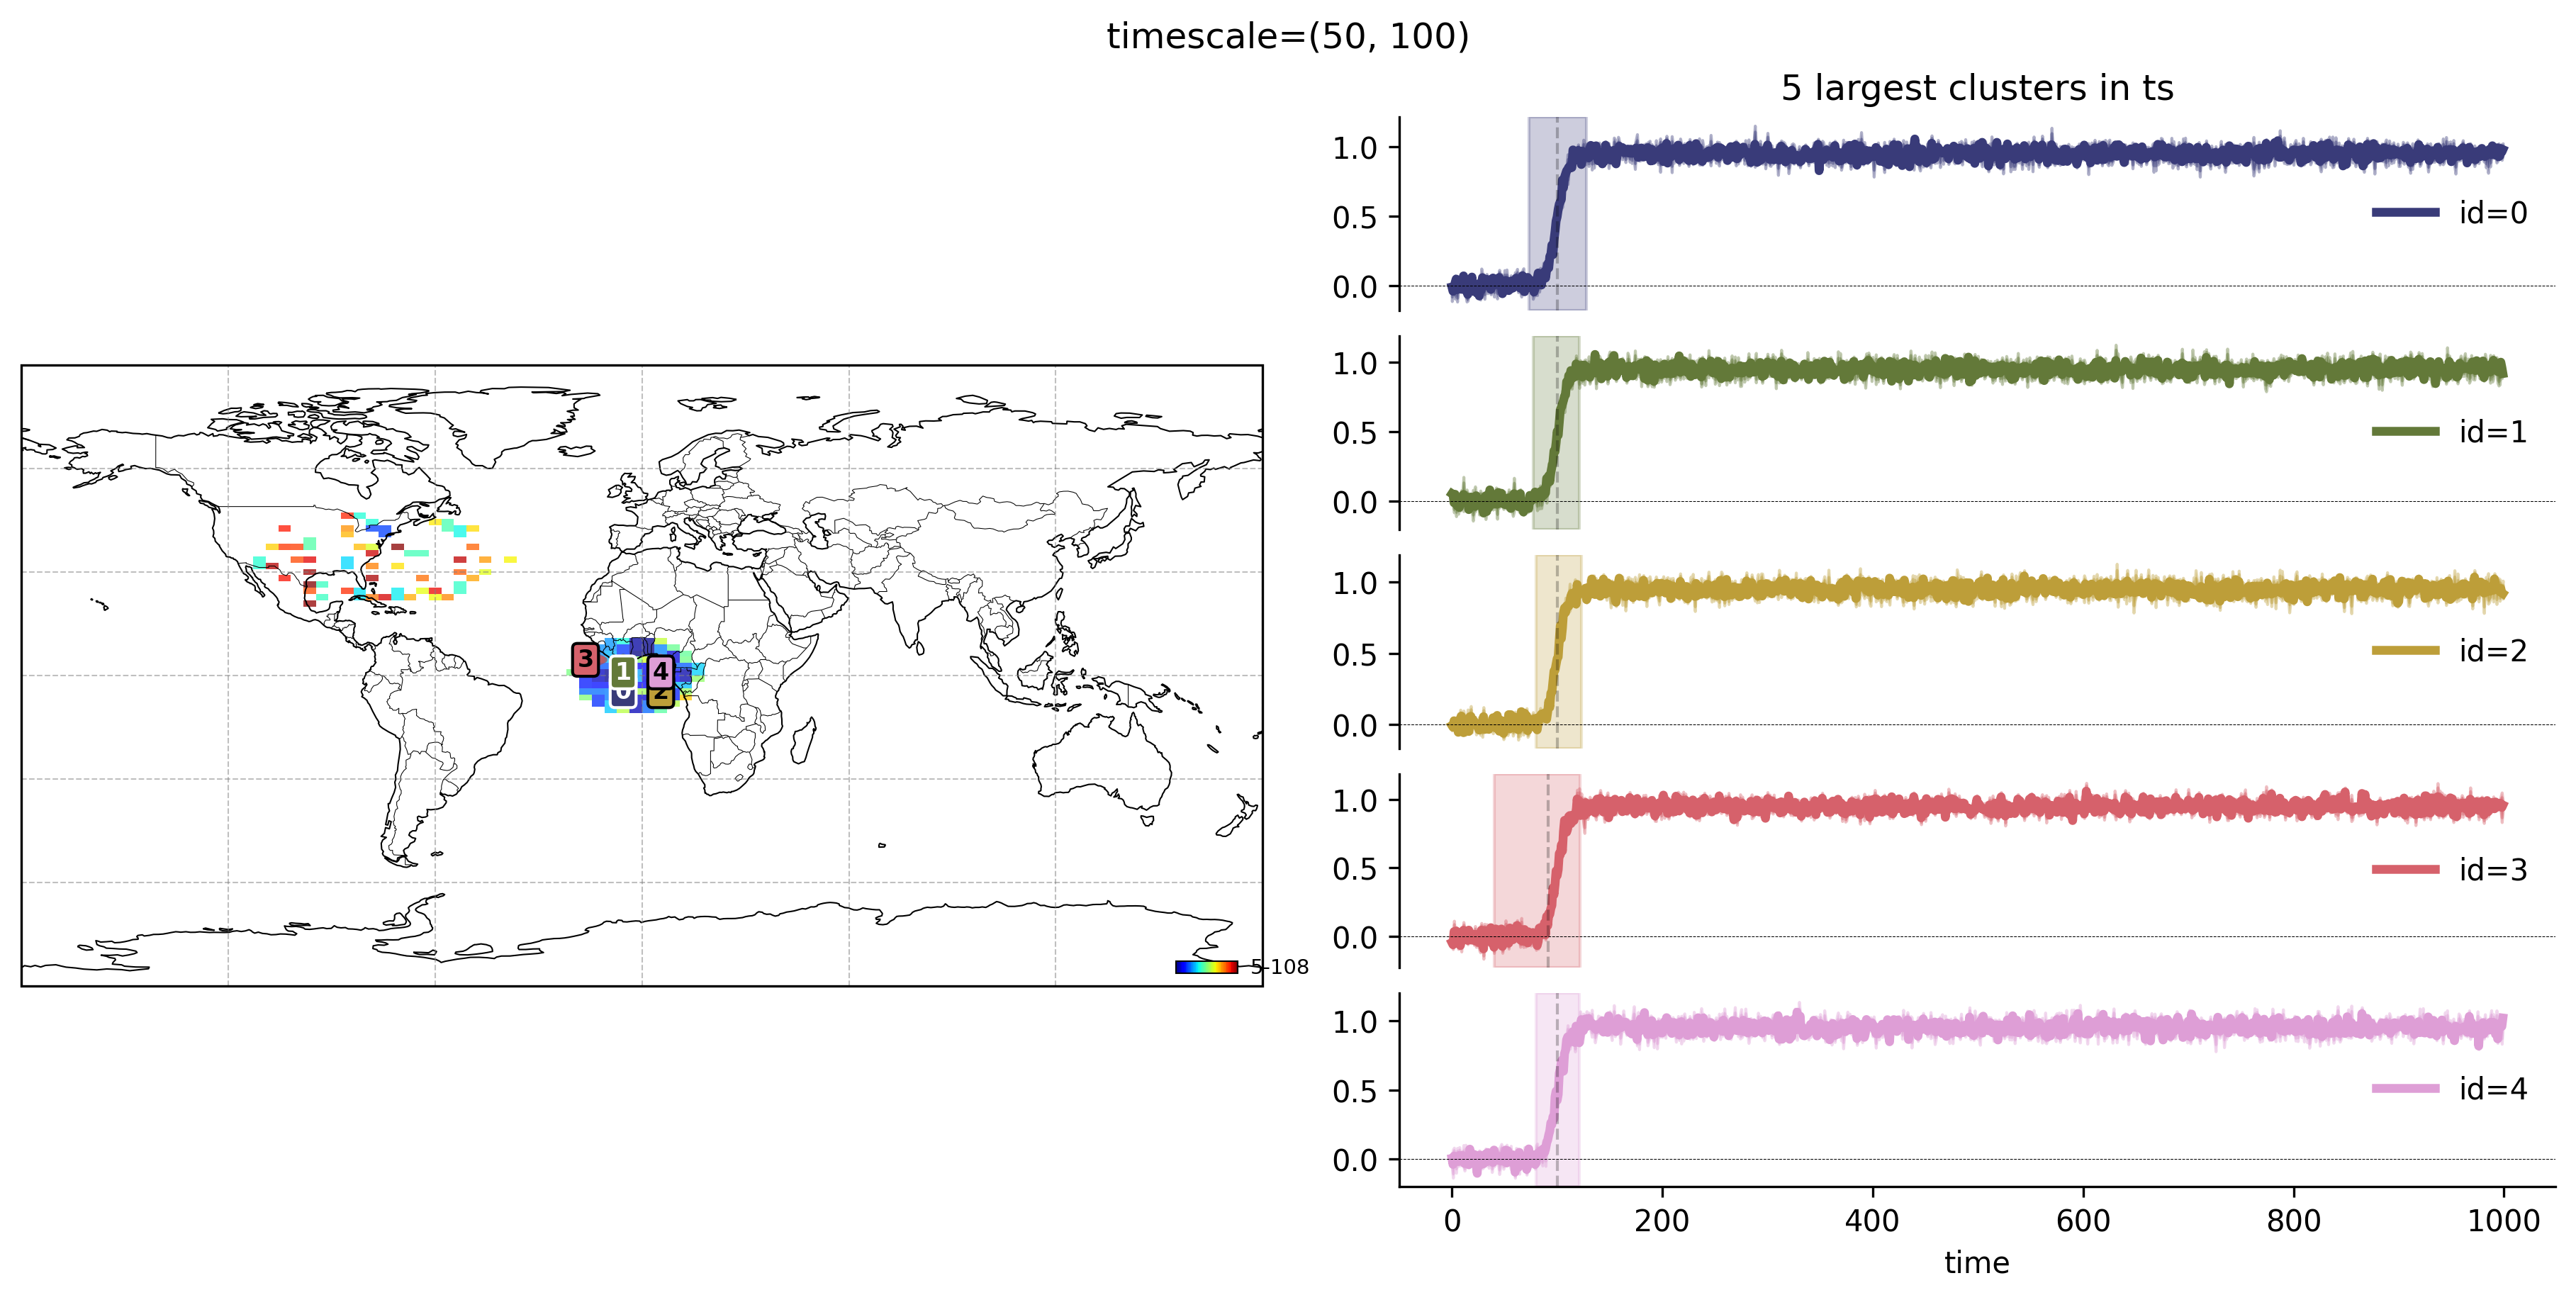

In [74]:
for timescale in [(5, 10), (50, 100)]:
    td.compute_shifts("ts", ASDETECT(timescale=timescale), overwrite=True)
    td.compute_clusters(
        "ts", HDBSCAN(min_cluster_size=25), shift_threshold=0.8, overwrite=True
    )
    fig, ax = td.plotter().cluster_overview("ts")
    fig.suptitle(f"timescale={timescale}")

These results are not so convincing to me (Jakob). It seems that you generally get better detection time series if you have a larger range of segments. Fast transitions are still well resolved if you include long segments.
